# 添加神经网络层

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]

noise = np.random.normal(0,0.05,x_data.shape)

y_data = np.square(x_data)-0.5 + noise

numpy.newaxis
从字面上是插入新的维度的意思
 \>>> b = np.array([1, 2, 3, 4, 5, 6])     
 \>>> b[np.newaxis]     
array([[1, 2, 3, 4, 5, 6]])      
 \>>> c = b[np.newaxis]  ＃equals c = b[np.newaxis,:]    
\>>> b.shape     
(6,)    
 \>>> c.shape    
(1, 6)

In [4]:
xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32,[None, 1])

In [5]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

In [6]:
prediction = add_layer(l1, 10, 1, activation_function=None)

loss =tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


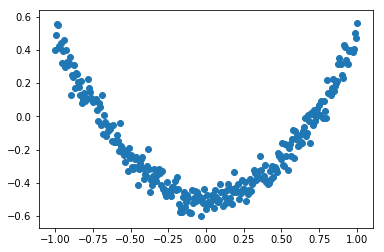

In [7]:
#important step
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()  # 使程序show完之后不暂停而是继续执行
plt.show()


In [8]:
for i in range(100):
    #train
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50:
        #  to see the step improvement
        #print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])  #出现下一条线之前要去除之前的一条线
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data,prediction_value, 'r-', lw=5)
        
        
        plt.pause(0.1)
       